<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.093452,60.364145,27.228870,41.021431,14.663641,197.371539,189.234643,8.136896
1,0.0,1.0,80.601431,25.856002,21.596194,92.715303,-1.349113,229.419816,226.309591,3.110225
2,0.0,2.0,61.452253,20.338803,98.420122,75.999730,2.050862,268.261769,261.570362,6.691407
3,0.0,3.0,43.410544,62.700086,38.075395,96.891981,-29.828453,221.249553,243.154463,-21.904910
4,0.0,4.0,93.321374,68.698959,48.073059,86.611269,29.019904,335.724565,306.581473,29.143093
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.030766,98.095038,99.243809,58.426498,43.044971,331.841083,305.057906,26.783177
19996,999.0,16.0,34.016746,70.830616,83.941388,80.858100,-6.114356,273.532495,292.375320,-18.842825
19997,999.0,17.0,42.746119,26.056491,55.256161,39.472252,-5.238861,168.292162,179.380276,-11.088114
19998,999.0,18.0,74.047572,96.553473,83.229972,56.638413,3.150857,323.620288,325.854129,-2.233841


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.093452,60.364145,27.228870,41.021431,14.663641,197.371539,189.234643,8.136896
1,0.0,1.0,80.601431,25.856002,21.596194,92.715303,-1.349113,229.419816,226.309591,3.110225
2,0.0,2.0,61.452253,20.338803,98.420122,75.999730,2.050862,268.261769,261.570362,6.691407
3,0.0,3.0,43.410544,62.700086,38.075395,96.891981,-29.828453,221.249553,243.154463,-21.904910
4,0.0,4.0,93.321374,68.698959,48.073059,86.611269,29.019904,335.724565,306.581473,29.143093
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.030766,98.095038,99.243809,58.426498,43.044971,331.841083,305.057906,26.783177
19996,999.0,16.0,34.016746,70.830616,83.941388,80.858100,-6.114356,273.532495,292.375320,-18.842825
19997,999.0,17.0,42.746119,26.056491,55.256161,39.472252,-5.238861,168.292162,179.380276,-11.088114
19998,999.0,18.0,74.047572,96.553473,83.229972,56.638413,3.150857,323.620288,325.854129,-2.233841


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    44.093452  60.364145  27.228870  41.021431  14.663641   
      1.0    80.601431  25.856002  21.596194  92.715303  -1.349113   
      2.0    61.452253  20.338803  98.420122  75.999730   2.050862   
      3.0    43.410544  62.700086  38.075395  96.891981 -29.828453   
      4.0    93.321374  68.698959  48.073059  86.611269  29.019904   
...                ...        ...        ...        ...        ...   
999.0 15.0   23.030766  98.095038  99.243809  58.426498  43.044971   
      16.0   34.016746  70.830616  83.941388  80.858100  -6.114356   
      17.0   42.746119  26.056491  55.256161  39.472252  -5.238861   
      18.0   74.047572  96.553473  83.229972  56.638413   3.150857   
      19.0   43.983207  41.403634  55.268828  66.381987  -1.082930   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    197.371539  189.234643   8.136896  
      1.0    229.419816  226.309591   3.110225  
      2.0    268.261769  261.570362   6.691407  
      3.0    221.249553  243.154463 -21.904910  
      4.0    335.724565  306.581473  29.143093  
...                 ...         ...        ...  
999.0 15.0   331.841083  305.057906  26.783177  
      16.0   273.532495  292.375320 -18.842825  
      17.0   168.292162  179.380276 -11.088114  
      18.0   323.620288  325.854129  -2.233841  
      19.0   215.954726  221.431835  -5.477109  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    44.093452  60.364145  27.228870  41.021431  14.663641   
      1.0    80.601431  25.856002  21.596194  92.715303  -1.349113   
      2.0    61.452253  20.338803  98.420122  75.999730   2.050862   
      3.0    43.410544  62.700086  38.075395  96.891981 -29.828453   
      4.0    93.321374  68.698959  48.073059  86.611269  29.019904   
...                ...        ...        ...        ...        ...   
999.0 15.0   23.030766  98.095038  99.243809  58.426498  43.044971   
      16.0   34.016746  70.830616  83.941388  80.858100  -6.114356   
      17.0   42.746119  26.056491  55.256161  39.472252  -5.238861   
      18.0   74.047572  96.553473  83.229972  56.638413   3.150857   
      19.0   43.983207  41.403634  55.268828  66.381987  -1.082930   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    197.371539  189.234643   8.136896  
      1.0    229.419816  226.309591   3.110225  
      2.0    268.261769  261.570362   6.691407  
      3.0    221.249553  243.154463 -21.904910  
      4.0    335.724565  306.581473  29.143093  
...                 ...         ...        ...  
999.0 15.0   331.841083  305.057906  26.783177  
      16.0   273.532495  292.375320 -18.842825  
      17.0   168.292162  179.380276 -11.088114  
      18.0   323.620288  325.854129  -2.233841  
      19.0   215.954726  221.431835  -5.477109  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.093452,60.364145,27.228870,41.021431,14.663641,197.371539,189.234643,8.136896
1,0.0,1.0,80.601431,25.856002,21.596194,92.715303,-1.349113,229.419816,226.309591,3.110225
2,0.0,2.0,61.452253,20.338803,98.420122,75.999730,2.050862,268.261769,261.570362,6.691407
3,0.0,3.0,43.410544,62.700086,38.075395,96.891981,-29.828453,221.249553,243.154463,-21.904910
4,0.0,4.0,93.321374,68.698959,48.073059,86.611269,29.019904,335.724565,306.581473,29.143093
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.030766,98.095038,99.243809,58.426498,43.044971,331.841083,305.057906,26.783177
19996,999.0,16.0,34.016746,70.830616,83.941388,80.858100,-6.114356,273.532495,292.375320,-18.842825
19997,999.0,17.0,42.746119,26.056491,55.256161,39.472252,-5.238861,168.292162,179.380276,-11.088114
19998,999.0,18.0,74.047572,96.553473,83.229972,56.638413,3.150857,323.620288,325.854129,-2.233841


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    44.093452  60.364145  27.228870  41.021431  14.663641   
      1.0    80.601431  25.856002  21.596194  92.715303  -1.349113   
      2.0    61.452253  20.338803  98.420122  75.999730   2.050862   
      3.0    43.410544  62.700086  38.075395  96.891981 -29.828453   
      4.0    93.321374  68.698959  48.073059  86.611269  29.019904   
...                ...        ...        ...        ...        ...   
999.0 15.0   23.030766  98.095038  99.243809  58.426498  43.044971   
      16.0   34.016746  70.830616  83.941388  80.858100  -6.114356   
      17.0   42.746119  26.056491  55.256161  39.472252  -5.238861   
      18.0   74.047572  96.553473  83.229972  56.638413   3.150857   
      19.0   43.983207  41.403634  55.268828  66.381987  -1.082930   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    197.371539  189.234643   8.136896  
      1.0    229.419816  226.309591   3.110225  
      2.0    268.261769  261.570362   6.691407  
      3.0    221.249553  243.154463 -21.904910  
      4.0    335.724565  306.581473  29.143093  
...                 ...         ...        ...  
999.0 15.0   331.841083  305.057906  26.783177  
      16.0   273.532495  292.375320 -18.842825  
      17.0   168.292162  179.380276 -11.088114  
      18.0   323.620288  325.854129  -2.233841  
      19.0   215.954726  221.431835  -5.477109  

[20000 rows x 8 columns]

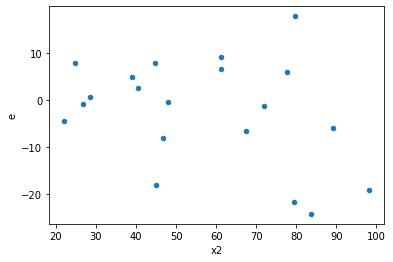

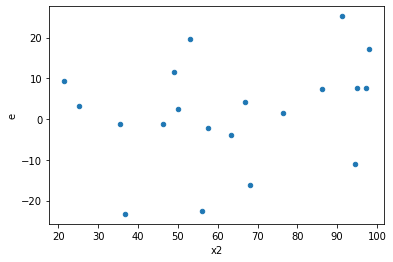

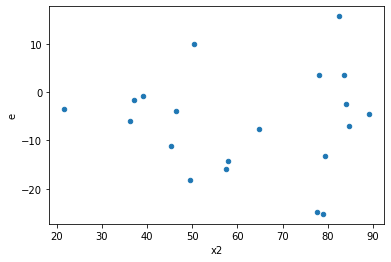

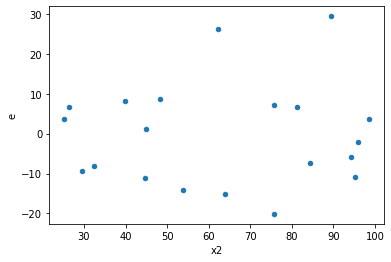

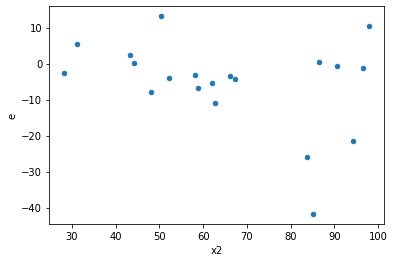

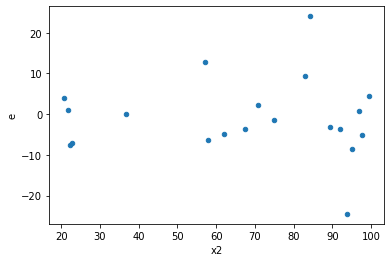

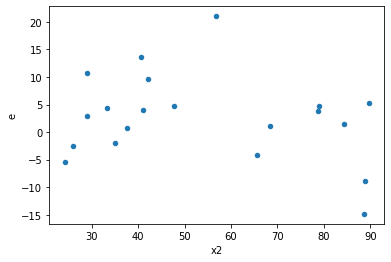

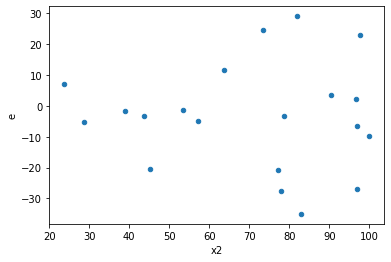

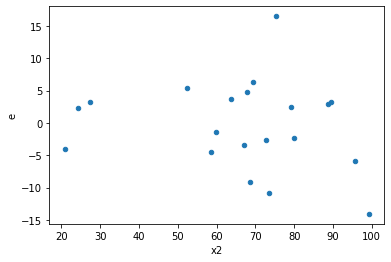

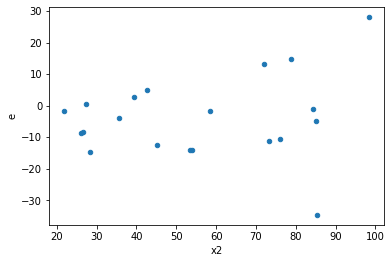

In [13]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,561.7534262146082,2276.349596098494,140.43835655365206,569.0873990246236,4.052222006793518,0.20404622633289815,0.8979768868335509,0.10202311316644908,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,17.790627620680773,1290.6583463714387,4.447656905170193,322.6645865928597,72.54709467759916,0.0010991718571549125,0.9994504140714225,0.0005495859285774563,Reject005=0 : Heteroscedasticity
2.0,4.0,4.0,789.6745132934134,1282.5474284080508,197.41862832335335,320.6368571020127,1.6241469197974538,0.6499563640263828,0.6750218179868086,0.3249781820131914,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,512.212809988032,669.374015160269,128.053202497008,167.34350379006725,1.3068279475007842,0.8016636519642635,0.5991681740178683,0.40083182598213174,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,301.58627724471154,599.1290838559079,75.39656931117788,149.78227096397697,1.9865926570981403,0.5225133630027292,0.7387433184986354,0.2612566815013646,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,296.996038366989,391.37658650362323,74.24900959174725,97.84414662590581,1.3177838622211218,0.7956285276881547,0.6021857361559226,0.39781426384407736,Reject005=1 : Homoscedasticity
11.0,4.0,4.0,574.5339068333831,601.609541725915,143.63347670834577,150.40238543147876,1.0471262610796337,0.9654750634438236,0.5172624682780882,0.4827375317219118,Reject005=1 : Homoscedasticity
12.0,4.0,4.0,218.94321676626336,712.606041508242,54.73580419156584,178.1515103770605,3.2547527712128073,0.2795059885759583,0.8602470057120208,0.13975299428797916,Reject005=1 : Homoscedasticity
13.0,4.0,4.0,526.4531599004339,863.7000505252777,131.61328997510847,215.92501263131942,1.6406018926519996,0.6432434269815226,0.6783782865092387,0.3216217134907613,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,561.7534262146082,2276.349596098494,140.43835655365206,569.0873990246236,4.052222006793518,0.20404622633289815,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,17.790627620680773,1290.6583463714387,4.447656905170193,322.6645865928597,72.54709467759916,0.0010991718571549125,Reject005=0 : Heteroscedasticity
2.0,4.0,4.0,789.6745132934134,1282.5474284080508,197.41862832335335,320.6368571020127,1.6241469197974538,0.6499563640263828,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,359.70518189804915,228.47432898082195,89.92629547451229,57.11858224520549,0.6351710803142618,0.6708828500101427,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,512.212809988032,669.374015160269,128.053202497008,167.34350379006725,1.3068279475007842,0.8016636519642635,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,301.58627724471154,599.1290838559079,75.39656931117788,149.78227096397697,1.9865926570981403,0.5225133630027292,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,296.996038366989,391.37658650362323,74.24900959174725,97.84414662590581,1.3177838622211218,0.7956285276881547,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,480.05781873835616,144.4893577054923,120.01445468458904,36.122339426373074,0.3009832400714271,0.27160817391331166,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,349.5173347414993,349.11806641722916,87.37933368537483,87.27951660430729,0.9988576580198363,0.9991427539740908,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      878
Reject005=0 : Heteroscedasticity    122
Name: Result_test, dtype: int64